## Chapter 3 Classification
2장은 '회귀'에 관한 다양한 코딩을 하였다.
이번에는 `분류`에 대한 코딩을 배워보도록 한다.

### Part 1 MNIST
MNIST 데이터셋은 70000개 가량의 숫자를 손글씨로 쓴 데이터셋으로, 머신러닝 분야의 **Hello World!** 라고 할 수 있다.
MNIST 데이터셋은 다양한 다운로드 경로가 있으며, scikit-learn에서도 MNIST 데이터셋을 제공받을 수 있다. 

In [3]:
# MNIST dataset download
# scikit-learn 0.24 패치 이후로 fetch_openml()이 pandas의 DataFrame 형식으로 반환.
# 이로 인해 오류가 발생하므로 as_frame=False를 추가해준다.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # fetch_openml() : openml의 dataset을 가져온다.
mnist.keys() # dictionary에서의 key는 column의 역할을 한다고 생각하면 편하다.

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

scikit-learn에서 읽어들인 데이터셋은 공통적인 딕셔너리 구조를 가진다.
- DESCR : 데이터셋에 대한 설명
- data : 행은 샘플, 열은 특성으로 구성된 배열
- target : 레이블 배열이 담긴 키

In [4]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
# 결과값을 보면, data의 개수는 총 70000개이며, X는 784(28 pixel*28 pixel)의 특성을 추가적으로 가진다.

(70000, 784)
(70000,)


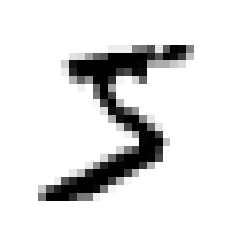

5
(70000,)


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28) # (784) -> (28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(y[0])

출력한 손글씨 이미지와 레이블을 비교해본 결과 같음을 확인할 수 있다.  
한편, MNIST dataset의 레이블 데이터는 **문자열**이기 떄문에 이를 머신러닝 알고리즘에 맞춰 **정수형**으로 바꿔준다.

In [13]:
import numpy as np

y=y.astype(np.uint8)

Training을 위해 MNIST dataset을 train set과 test set으로 나눈다.  
이 때, MNIST dataset은 이미 `셔플`되어 있고 훈련 데이터와 테스트 데이터를 `나누어`놓았기 때문에, 간단한 분할만 진행하면 된다. (셔플된 데이터는 모든 교차 검증 폴드를 비슷하게 만들어주는 효과가 있다.)

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000], y[60000:]

## Part 2 Training Binary Classifier
처음에는 숫자 '5'만을 인식하는 문제라고 생각해보자.  
이를 해결하기 위해서는 **5인 이미지**와 **5가 아닌 이미지**를 분류하는 `Binary Classifier`(이진 분류기)가 필요하다.

In [15]:
# 학습, 테스트 데이터에서 레이블이 '5'인 데이터를 모두 가져온다.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

optimizer(분류 모델)을 선정한다.  
optimizer에 관한 자료는 
https://ganghee-lee.tistory.com/24, https://wiserloner.tistory.com/1032 에서 참고.

In [16]:
# Stochastic Gradient Descent(SGD)를 사용하여 mnist data를 훈련한다.

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #SGD는 무작위성을 이용하므로 결과 재현을 위해서는 random_state를 지정해야 한다.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
# 학습한 모델로 처음 출력했던 '5' 이미지를 정상적으로 예측할 수 있는지 확인
sgd_clf.predict([some_digit])
# 함수 실행 결과 True: 제대로 예측했음

array([ True])